#### [ Fish 길이에 따른 무게 예측]
- 데이터셋 : fish.csv
- 피쳐 : 길이 Length
- 타겟 : 무게 Weight
- 학습방법 : 지도학습 - 회귀(Regression)
- 알고리즘 : LinearRegression

In [212]:
# function.py
def checkModel():
    return "Model Checked Successfully"


In [213]:
## [1-1] 모듈로딩 - 데이터 분석용
from sklearn.linear_model import LinearRegression                       # 머신러닝 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error     # 성능평가 모듈 
from sklearn.model_selection import train_test_split                    # 데이터셋 분리 모듈
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [214]:
## [1-2] 데이터 준비
DATA = '../data/fish.csv'

In [215]:
## - 데이터 로딩
FISHDF = pd.read_csv(DATA, usecols=[1, 2], engine='python')
FISHDF = FISHDF[:35]
display(FISHDF)

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0
5,450.0,29.7
6,500.0,29.7
7,390.0,30.0
8,450.0,30.0
9,500.0,30.7


[2] 데이터 분석 - 탐색적 분석

<Axes: xlabel='Length', ylabel='Weight'>

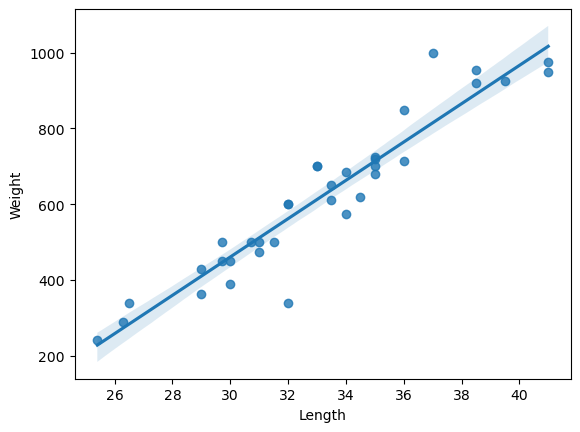

In [216]:
# [3] 데이터 분석
sns.regplot(x='Length', y='Weight', data=FISHDF)

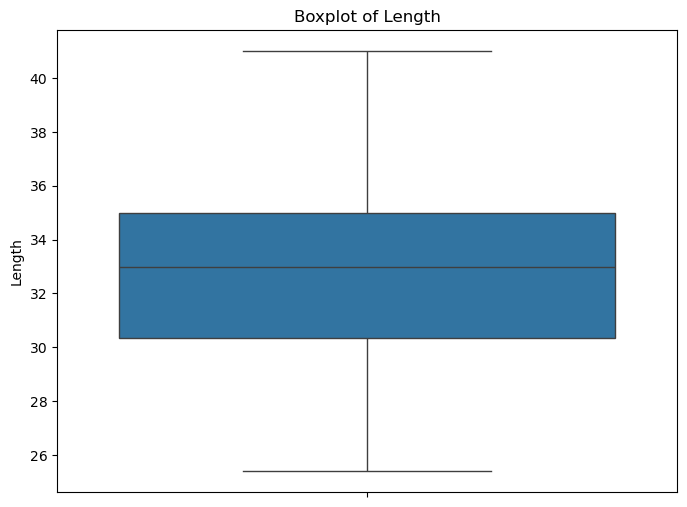

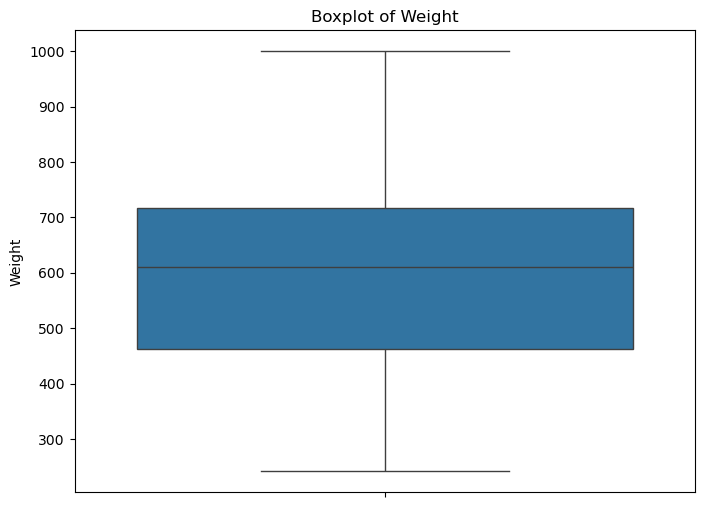

In [217]:
# Length에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(y='Length', data=FISHDF)
plt.title('Boxplot of Length')
plt.show()

# Weight에 대한 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(y='Weight', data=FISHDF)
plt.title('Boxplot of Weight')
plt.show()

In [218]:
# - 길이와 무게는 선형의 분포
# - 길이에 따른 무게를 예측하기 위한 알고리즘으로 선형 모델 선정
# - 학습 알고리즘 ==> LinearRegression 진행

[3] 학습 진행 <hr>

In [219]:
## 학습 진행 => 알고리즘객체 생성
Model = LinearRegression()

In [220]:
# 데이터셋 준비 => 학습용, 검증용, 테스트용 
featureDF = FISHDF[['Length']] # 2차원
targetSR = FISHDF['Weight']    # 1차원 
# 학습용 : 테스트용 = 70:30 
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=10)

In [221]:
Model.fit(x_train, y_train)

LinearRegression()

In [222]:
# [5] 과대적합 확인
trainDS = (x_train, y_train)  # (데이터, 라벨)의 형태
testDS = (x_test, y_test) 
trainDS, testDS

((    Length
  22    34.5
  18    33.5
  21    34.0
  6     29.7
  11    31.0
  33    41.0
  20    34.0
  30    38.5
  19    33.5
  4     29.0
  29    37.0
  10    31.0
  32    39.5
  34    41.0
  8     30.0
  31    38.5
  16    33.0
  25    35.0
  28    36.0
  27    36.0
  17    33.0
  0     25.4
  15    32.0
  9     30.7,
  22     620.0
  18     610.0
  21     685.0
  6      500.0
  11     500.0
  33     975.0
  20     575.0
  30     920.0
  19     650.0
  4      430.0
  29    1000.0
  10     475.0
  32     925.0
  34     950.0
  8      450.0
  31     955.0
  16     700.0
  25     725.0
  28     850.0
  27     714.0
  17     700.0
  0      242.0
  15     600.0
  9      500.0
  Name: Weight, dtype: float64),
 (    Length
  23    35.0
  24    35.0
  2     26.5
  7     30.0
  5     29.7
  3     29.0
  12    31.5
  14    32.0
  26    35.0
  13    32.0
  1     26.3,
  23    680.0
  24    700.0
  2     340.0
  7     390.0
  5     450.0
  3     363.0
  12    500.0
  14    600.0
  26    720.

In [223]:
## -> 모델 파라미터 확인
print(f'coef_ : {Model.coef_}, intercept_ : {Model.intercept_}')

coef_ : [49.56278573], intercept_ : -1009.6618076894249


- [학습 결과 분석]
* 모델 적합도 : Train > Test : 과대적합
* 비용 계산값 : Train < Test : 과소적합

- [해결방안]
* 과도한 반복 학습 => scikit-learn에서는 개발자 제어 불가 X
* 모델 복잡한가? =? 피쳐가 많은가? 피쳐는 1개 밖에 없음
* 데이터가 충분한가? 데이터가 충분하지 않음
* 해달 알고리즘의 결과물 분석 => 선형식과 데이터의 관계 => 완벽한 선형이 아님.. 오히려 곡선에 가까움

[5] 예측 서비스 <hr>

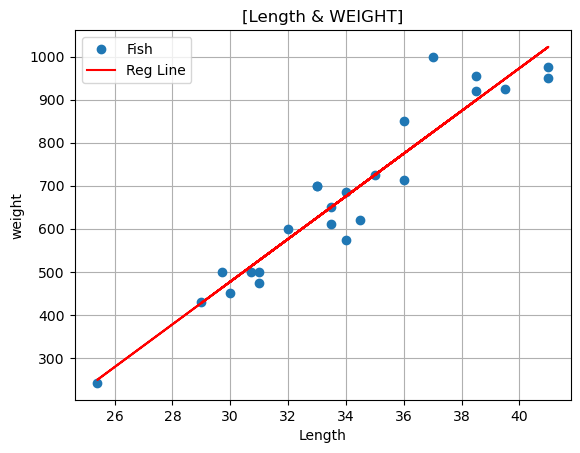

In [224]:
## 시각화 및 회귀선
## 데이터 시각화
plt.plot(x_train, y_train, 'o', label='Fish')

# 선형회귀에서 구한 y=model.coef_*x+model.intercept 공식의 직선 긋기
plt.plot(x_train, Model.predict(x_train), 'r-', label='Reg Line')

plt.xlabel('Length')
plt.ylabel('weight')
plt.title('[Length & WEIGHT]')
plt.legend()
plt.grid()
plt.show()

[모델 성능평가에서의 문제점 개선을 위해서 추가 작업]

- 손실/비용함수 값이 큼 ==> 직선을 곡선의 형태 수식
- 기존 존재하는 피쳐를 활용해서 피쳐 생성 ==> 다항회귀

[6] 특성공학 => 피쳐 생성 후 추가 <hr>
- 관련 모듈 로딩
- 학습 진행 전에 전처리 단계에서 피쳐 추가

In [225]:
## 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures

In [226]:
## [6-2] PolynomialFeatures 클래스 사용법
## - 임시데이터
x = [[1, 2]]

# 특성 생성 객체 생성
poly=PolynomialFeatures(degree=2)

# - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(x)

print(f'n_feature_in_:', poly.n_features_in_)
print(f'n_output_features_:', poly.n_output_features_)

# - 피쳐를 생성해서 추가
poly.transform(x)

n_feature_in_: 2
n_output_features_: 6


array([[1., 1., 2., 1., 2., 4.]])

In [227]:
# 특성 생성 객체 생성
poly=PolynomialFeatures(interaction_only=True) # 피쳐끼리 곱셈값만 적용

# - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(x)

print(f'n_feature_in_:', poly.n_features_in_)
print(f'n_output_features_:', poly.n_output_features_)

# - 피쳐를 생성해서 추가
poly.transform(x)

n_feature_in_: 2
n_output_features_: 4


array([[1., 1., 2., 2.]])

In [228]:
# 특성 생성 객체 생성
poly=PolynomialFeatures(include_bias=False, interaction_only=True) # 피쳐끼리 곱셈값만 적용

# - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(x)

print(f'n_feature_in_:', poly.n_features_in_)
print(f'n_output_features_:', poly.n_output_features_)

# - 피쳐를 생성해서 추가
poly.transform(x)

n_feature_in_: 2
n_output_features_: 3


array([[1., 2., 2.]])

In [229]:
# 특성 생성 객체 생성 
poly=PolynomialFeatures(include_bias=False) # 피쳐끼리 곱셈값만 적용

# - 객체/인스턴스에 피쳐 생성할 정보 제공 + 피쳐 생성 후 제공
x2= poly.fit_transform(x)

print(f'n_feature_in_:', poly.n_features_in_)
print(f'n_output_features_:', poly.n_output_features_)
print(x2)

n_feature_in_: 2
n_output_features_: 5
[[1. 2. 1. 2. 4.]]


In [230]:
## [6-3] 데이터셋 즉, 학습용/테스트용 데이터셋 피쳐 추가
## - 학 습 용 : x_train
## - 테스트용 : x_test
## -> 학습용 데이터셋으로 피쳐 추가 정보 제공
poly=PolynomialFeatures()

## -> 학습용 피쳐 제공
poly.fit(x_train)

## -> 학습용, 테스트용 피쳐 추가
poly_train = poly.transform(x_train)
poly_test = poly.transform(x_test)

In [231]:
print(f'[ 학 습 용 피쳐 ] => {type(poly_train)}, {poly_train.shape}')
print(f'[ 테스트용 피쳐 ] => {type(poly_test)}, {poly_test.shape}')

[ 학 습 용 피쳐 ] => <class 'numpy.ndarray'>, (24, 3)
[ 테스트용 피쳐 ] => <class 'numpy.ndarray'>, (11, 3)


[7] 재학습 <hr>

In [232]:
## - 선형회귀인스턴스 생성
model = LinearRegression()

## - 학습
model.fit(poly_train, y_train)

LinearRegression()

In [233]:
## - 모델 파라미터 확인
print(f'coef_ : {model.coef_}')
print(f'intercept_ : {model.intercept_}')

coef_ : [ 0.         83.73599434 -0.50125984]
intercept_ : -1584.6654259046718


[8] 재학습 결과 <hr>

In [234]:
## [8-1] 시각화 - 곡선 회귀선
import numpy as np

# 곡선 회귀식에 대입할 데이터
x = np.linspace(1,42) # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 형성
print('shape:', x.shape)
print(x)

shape: (50,)
[ 1.          1.83673469  2.67346939  3.51020408  4.34693878  5.18367347
  6.02040816  6.85714286  7.69387755  8.53061224  9.36734694 10.20408163
 11.04081633 11.87755102 12.71428571 13.55102041 14.3877551  15.2244898
 16.06122449 16.89795918 17.73469388 18.57142857 19.40816327 20.24489796
 21.08163265 21.91836735 22.75510204 23.59183673 24.42857143 25.26530612
 26.10204082 26.93877551 27.7755102  28.6122449  29.44897959 30.28571429
 31.12244898 31.95918367 32.79591837 33.63265306 34.46938776 35.30612245
 36.14285714 36.97959184 37.81632653 38.65306122 39.48979592 40.32653061
 41.16326531 42.        ]


In [235]:
## - 곡선 회귀식 : y = x^0*W0 + x^1*W1 x^2*W2 + b
y = (1*model.coef_[0]) + (x * model.coef_[1]) + ((x**2)*model.coef_[2]) + model.intercept_
## x^0, x^1, x^2 = 1, 3, 9
print('shape :', y.shape)
print(y)

shape : (50,)
[-1501.43069141 -1432.55566735 -1364.38253234 -1296.91128637
 -1230.14192944 -1164.07446156 -1098.70888272 -1034.04519293
  -970.08339218  -906.82348047  -844.26545781  -782.4093242
  -721.25507962  -660.8027241   -601.05225762  -542.00368018
  -483.65699178  -426.01219243  -369.06928213  -312.82826087
  -257.28912865  -202.45188548  -148.31653135   -94.88306627
   -42.15149023     9.87819676    61.20599471   111.83190362
   161.75592348   210.9780543    259.49829607   307.3166488
   354.43311248   400.84768712   446.56037271   491.57116926
   535.88007677   579.48709523   622.39222465   664.59546502
   706.09681635   746.89627863   786.99385187   826.38953606
   865.08333121   903.07523732   940.36525438   976.9533824
  1012.83962137  1048.0239713 ]


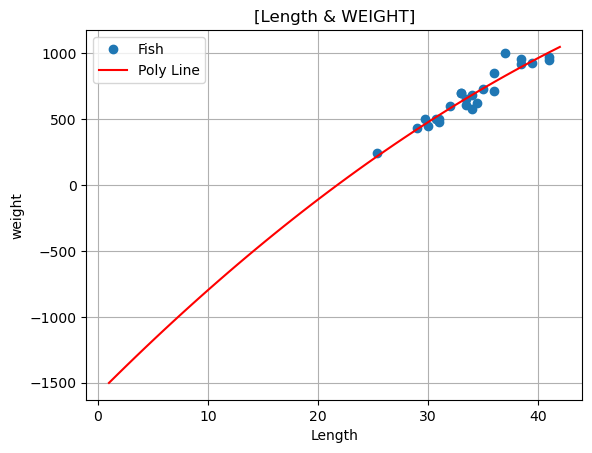

In [236]:
## 시각화 및 회귀선
## 데이터 시각화
plt.plot(x_train, y_train, 'o', label='Fish')

# 선형회귀에서 구한 y=model.coef_*x+model.intercept 공식의 직선 긋기
plt.plot(x, y, 'r-', label='Poly Line')

plt.xlabel('Length')
plt.ylabel('weight')
plt.title('[Length & WEIGHT]')
plt.legend()
plt.grid()
plt.show()

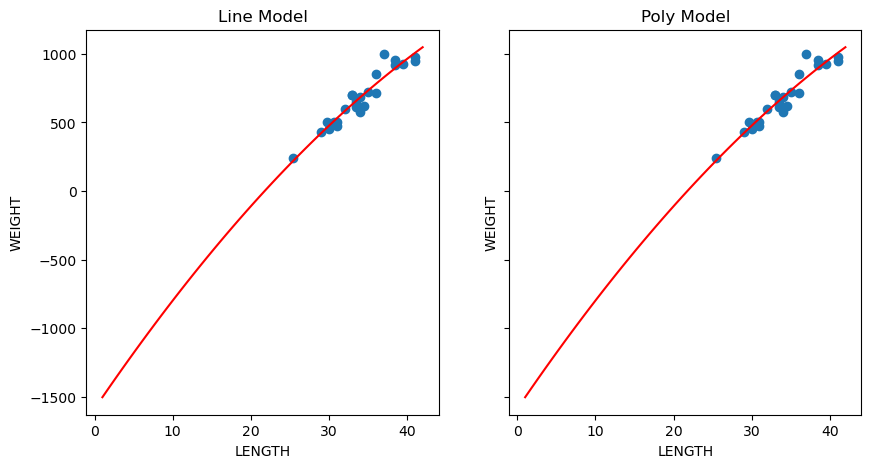

In [242]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharey=True)

axes = axes.flatten() # 2D [[], []] => 1D [ , ]

for ax, title in zip(axes, ["Line Model", "Poly Model"]):
	ax.plot(x_train, y_train, 'o', label='Fish')
	ax.plot(x, y, 'r-', label='Poly Line')
	ax.set_xlabel('LENGTH')
	ax.set_ylabel('WEIGHT')
	ax.set_title(title)

plt.show()

In [ ]:
nums = [10,		20]
title = ["Train", "Test"]
names = ["Hong", "MM"]
sign = ["★", "♡"]
